# Polar plot for one cell, one experiment

## Pick experiment and cell

In [1]:
import os
drive_path = '/media/stephen/Brain20191/allen-brain-observatory/visual-coding-2p/'
if not os.path.isdir(drive_path):
    drive_path = '/media/alihamodi/Brain2019/allen-brain-observatory/visual-coding-2p/'

In [2]:
exp_id = 501836392
ec_id = 511510650
cell_specimen_id = 517419703
# https://observatory.brain-map.org/visualcoding/search/cell?id=517419703#drifting_grating

In [9]:
import warnings; warnings.simplefilter('ignore')
import os
import pandas as pd
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
import allensdk.brain_observatory.stimulus_info as stim_info
from utils.data_wrappers import *
manifest_file = os.path.join(drive_path,'manifest.json')
boc = BrainObservatoryCache(manifest_file=manifest_file)

In [4]:
exps = boc.get_ophys_experiments(stimuli=[stim_info.DRIFTING_GRATINGS],
                                experiment_container_ids=[ec_id],
        targeted_structures = ['VISp'],
        imaging_depths = [175],
        cre_lines = ['Cux2-CreERT2'])
exps

[{'id': 501836392,
  'imaging_depth': 175,
  'targeted_structure': 'VISp',
  'cre_line': 'Cux2-CreERT2',
  'reporter_line': 'Ai93(TITL-GCaMP6f)',
  'acquisition_age_days': 108,
  'experiment_container_id': 511510650,
  'session_type': 'three_session_A',
  'donor_name': '222425',
  'specimen_name': 'Cux2-CreERT2;Camk2a-tTA;Ai93-222425',
  'fail_eye_tracking': True}]

In [5]:
cells = boc.get_cell_specimens()
cells = pd.DataFrame.from_records(cells)

In [6]:
cells[cells['cell_specimen_id'] == cell_specimen_id]

,all_stim,area,cell_specimen_id,donor_full_genotype,dsi_dg,experiment_container_id,failed_experiment_container,g_dsi_dg,g_osi_dg,g_osi_sg,...,specimen_id,tfdi_dg,time_to_peak_ns,time_to_peak_sg,tld1_id,tld1_name,tld2_id,tld2_name,tlr1_id,tlr1_name
1673,False,VISp,517419703,Cux2-CreERT2/Cux2-CreERT2;Camk2a-tTA/wt;Ai93(T...,0.370128,511510650,False,0.370128,1.0,0.87447,...,495727000,0.44284,0.23219,0.26536,177839004,Cux2-CreERT2,177837320.0,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)


In [7]:
from utils.data_wrappers import *
dg_response_filter = get_dg_response_filter_from_saskia()
dg_response_filter[dg_response_filter['cell_specimen_id'] == cell_specimen_id]

,cell_specimen_id,responsive
30549,517419703,True


Hooray! We found cell **517416426** in experiment container **511510640**, where the experiment is **[dg, VISl, 175, Cux2-CreERT2]**, and the cell is **responsive**

## Polar plot

This cell's plot exactly matches allen's data! https://observatory.brain-map.org/visualcoding/search/cell?id=517419703#drifting_grating.
Great! Our get_avg_normalized_response() is probably right :)

/home/stephen/anaconda3/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)
/home/stephen/anaconda3/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)
/home/stephen/anaconda3/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)
/home/stephen/anaconda3/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)
/home/stephen/anaconda3/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use 

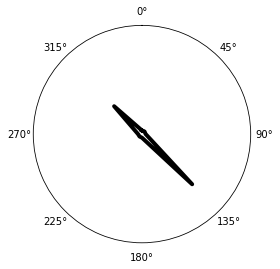

In [8]:
from utils.polarplot import *
from utils.polardata import *
from utils.data_wrappers import *
 
polardata = get_avg_normalized_response(
        boc=boc,
        session_id=exp_id,
        cell_specimen_id = cell_specimen_id,
        temporal_frequency=2.0)
theta, r = convert_polar_dict_to_arrays(polardata)
fig, axes = plt.subplots(nrows=1, ncols=1, subplot_kw=dict(polar=True))
polar_plot(axes, theta, r, color='black', linewidth=4)


# Polar plot for all cells in one experiment

Apply **filtering** for cells in this experiment

In [10]:
exps = boc.get_ophys_experiments(
    experiment_container_ids=[ec_id],
    stimuli=[stim_info.DRIFTING_GRATINGS])
exps = pd.DataFrame.from_dict(exps)
cells = boc.get_cell_specimens()
cells = pd.DataFrame.from_records(cells)

dg_response_filter = get_dg_response_filter_from_saskia()

# in_category_cells = cells[cells.experiment_container_id == ec_id]
# responsive_cells = get_filtered_cells(in_category_cells, dg_response_filter)
# responsive_cells = responsive_cells[responsive_cells['p_dg'] < 0.05]
# # direction selective cells
# dsi_cells_one = responsive_cells[(responsive_cells['dsi_dg'] > 0.9)]
# dsi_cells_two = responsive_cells[(responsive_cells['dsi_dg'] > 0.8)]
# dsi_cells_three = responsive_cells[(responsive_cells['dsi_dg'] > 0.7)]
# dsi_cells_four = responsive_cells[(responsive_cells['dsi_dg'] > 0.6)]
# dsi_cells_five = responsive_cells[(responsive_cells['dsi_dg'] > 0.5)]
# print("direction-selective cells >0.9: %d" % len(dsi_cells_one))
# print("direction-selective cells >0.8: %d" % len(dsi_cells_two))
# print("direction-selective cells >0.7: %d" % len(dsi_cells_three))
# print("direction-selective cells >0.6: %d" % len(dsi_cells_four))
# print("direction-selective cells >0.5: %d" % len(dsi_cells_five))
# responsive_cells = dsi_cells_two

in_category_cells = cells[cells.experiment_container_id == ec_id]
filtered_cells = get_filtered_cells(in_category_cells, dg_response_filter)
filtered_cells = filtered_cells[filtered_cells.dsi_dg > 0.5]
print ("In this experiment, we have", len(in_category_cells),
       "cells, but after filtering, we have", len(filtered_cells), "cells")


In this experiment, we have 243 cells, but after filtering, we have 37 cells


In [11]:
thetas = []
rs = []
cell_ids = []
for cell_specimen_id in filtered_cells.cell_specimen_id:
    one_cell_polar_data_dict = get_avg_normalized_response(
        boc=boc,
        session_id=exp_id,
        cell_specimen_id = cell_specimen_id,
        temporal_frequency=2.0)
    if one_cell_polar_data_dict is None:
        continue
    theta, r = convert_polar_dict_to_arrays(one_cell_polar_data_dict)
    thetas.append(theta)
    rs.append(r)
    cell_ids.append(cell_specimen_id)

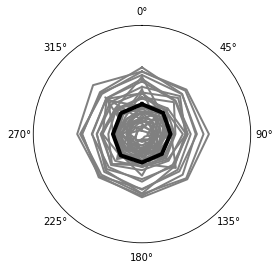

In [12]:
agg_theta, agg_r = get_avg_polar(thetas, rs)
# Or use get_median_polar

fig, axes = plt.subplots(nrows=1, ncols=1, subplot_kw=dict(polar=True))
polar_plot_population(ax=axes,
                      bold_theta = agg_theta,
                      bold_r = agg_r,
                      grey_thetas = thetas, 
                      grey_rs = rs)

Let's see each cell's polar plot

cell id 517419064
g_dsi_dg 0.323180714314738
dsi_dg 0.666547309721309
p_dg 3.43202755221211e-23
pref_dir_dg 225.0


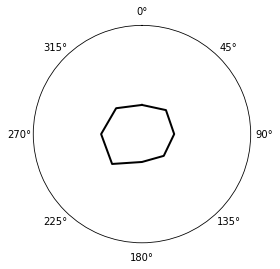

cell id 517419101
g_dsi_dg 0.894810181889737
dsi_dg 1.44419681790238
p_dg 1.06870295993582e-21
pref_dir_dg 45.0


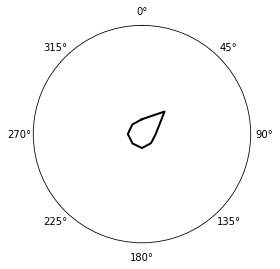

cell id 517419280
g_dsi_dg 0.494840215273413
dsi_dg 0.731129790554648
p_dg 0.00416057092823998
pref_dir_dg 0.0


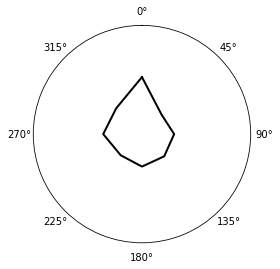

cell id 517419285
g_dsi_dg 0.328522691341198
dsi_dg 0.739453736674388
p_dg 2.33327444807734e-07
pref_dir_dg 225.0


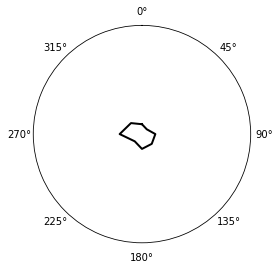

cell id 517419302
g_dsi_dg 0.313968613645282
dsi_dg 1.03324335003793
p_dg 0.00021714823462001
pref_dir_dg 225.0


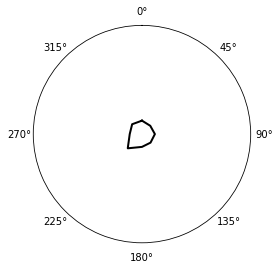

cell id 517419328
g_dsi_dg 0.42101926309787
dsi_dg 0.653603587905033
p_dg 4.69085467083948e-07
pref_dir_dg 45.0


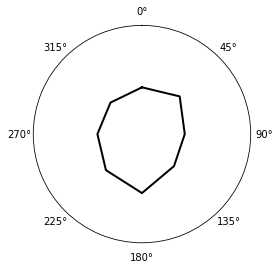

cell id 517419533
g_dsi_dg 0.569288812135067
dsi_dg 1.0813344160444
p_dg 1.57477262575506e-20
pref_dir_dg 0.0


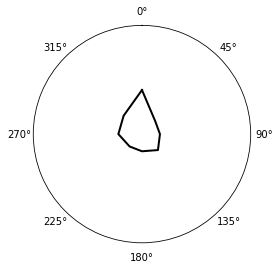

cell id 517419753
g_dsi_dg 0.343910057334085
dsi_dg 0.668323777398991
p_dg 0.0446611469632888
pref_dir_dg 315.0


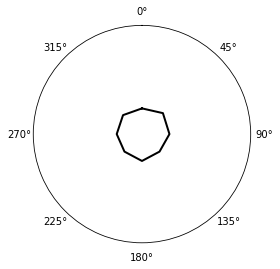

cell id 517419775
g_dsi_dg 0.502859228176441
dsi_dg 0.525157315636105
p_dg 0.000233615761791758
pref_dir_dg 315.0


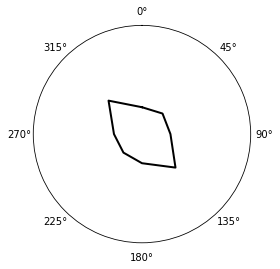

cell id 517419797
g_dsi_dg 0.33435870916249
dsi_dg 1.03920818885005
p_dg 1.72088502639276e-06
pref_dir_dg 0.0


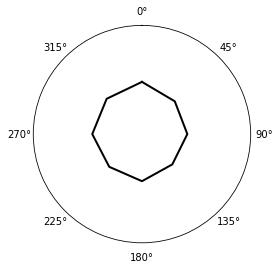

cell id 517419817
g_dsi_dg 0.797295562055789
dsi_dg 1.04114309258443
p_dg 2.95420559028729e-09
pref_dir_dg 0.0


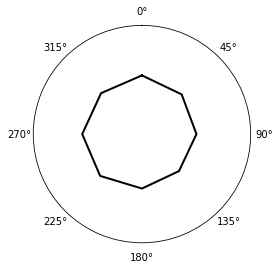

cell id 517419832
g_dsi_dg 0.601614781396599
dsi_dg 0.760357453123342
p_dg 3.57502086238952e-20
pref_dir_dg 0.0


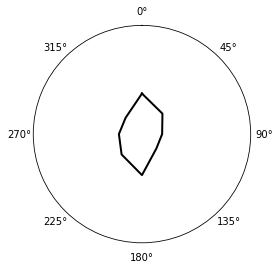

cell id 517419902
g_dsi_dg 0.631982950391597
dsi_dg 1.79331509611283
p_dg 0.0169887693909978
pref_dir_dg 315.0


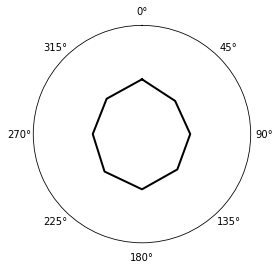

cell id 517420095
g_dsi_dg 0.521825842094179
dsi_dg 1.15859936304583
p_dg 2.14210070921324e-37
pref_dir_dg 135.0


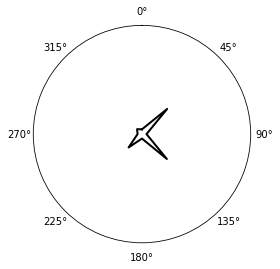

cell id 517420102
g_dsi_dg 0.390375417563163
dsi_dg 0.58695497590963
p_dg 4.09486666440945e-12
pref_dir_dg 270.0


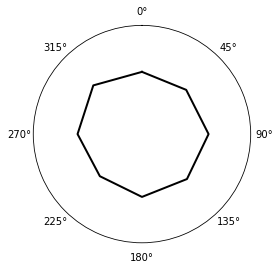

cell id 517420153
g_dsi_dg 0.898491618056104
dsi_dg 1.00835768753525
p_dg 0.00475495207207315
pref_dir_dg 270.0


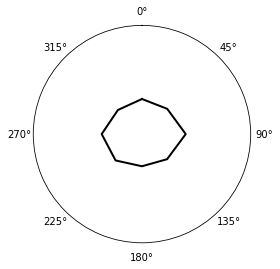

cell id 517420158
g_dsi_dg 0.543926685112805
dsi_dg 0.640976583177879
p_dg 2.27464946630592e-07
pref_dir_dg 0.0


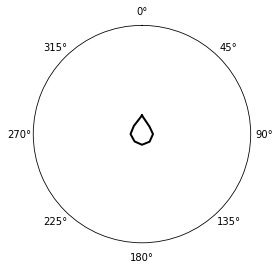

cell id 517420179
g_dsi_dg 0.367039265459729
dsi_dg 0.556101089360878
p_dg 0.0248849268517652
pref_dir_dg 90.0


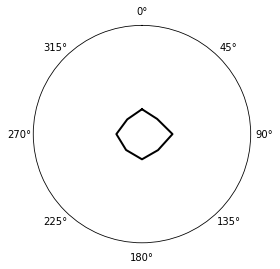

cell id 517420418
g_dsi_dg 0.983418141283648
dsi_dg 1.08460889713801
p_dg 3.40822255519601e-39
pref_dir_dg 315.0


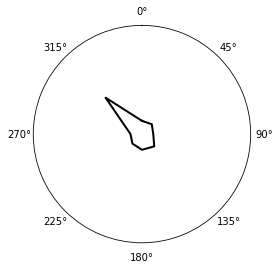

cell id 517420452
g_dsi_dg 0.558024523384968
dsi_dg 0.762979215433501
p_dg 5.8665409342673e-16
pref_dir_dg 45.0


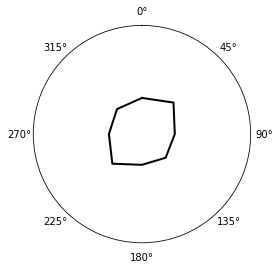

cell id 517420573
g_dsi_dg 0.438434452084507
dsi_dg 0.689473472717982
p_dg 3.62722142715756e-11
pref_dir_dg 225.0


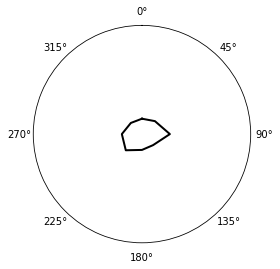

cell id 517420694
g_dsi_dg 0.487918930798485
dsi_dg 0.593126838513717
p_dg 6.86914168181415e-07
pref_dir_dg 45.0


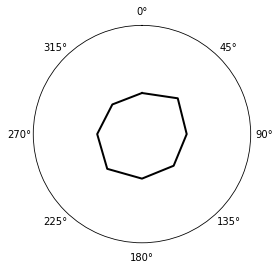

cell id 517420735
g_dsi_dg 0.48920188801802
dsi_dg 0.634904137033386
p_dg 0.00698001025117025
pref_dir_dg 225.0


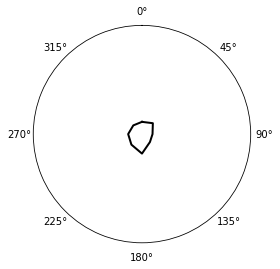

cell id 517420741
g_dsi_dg 0.482328226408032
dsi_dg 1.66320280640752
p_dg 0.0201318098016542
pref_dir_dg 270.0


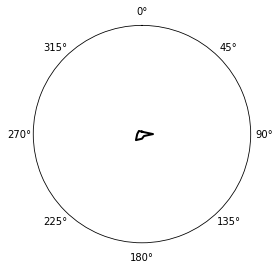

cell id 517421046
g_dsi_dg 0.97669360710824
dsi_dg 1.90591318446175
p_dg 8.64530665594928e-06
pref_dir_dg 90.0


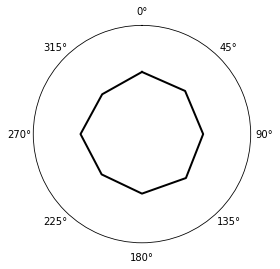

cell id 517421072
g_dsi_dg 0.835983904575503
dsi_dg 0.915224027728979
p_dg 3.4085164660346e-15
pref_dir_dg 315.0


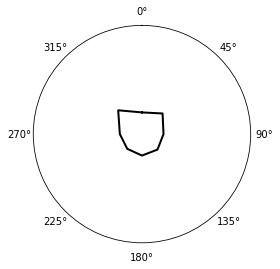

cell id 517421085
g_dsi_dg 0.987296851810403
dsi_dg 1.07863962584032
p_dg 1.22270494355591e-05
pref_dir_dg 225.0


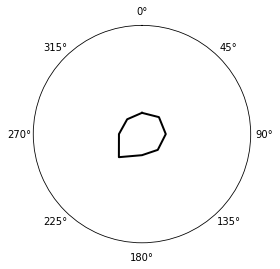

cell id 517421098
g_dsi_dg 0.539012514166776
dsi_dg 0.935321851592649
p_dg 0.0035027418508809
pref_dir_dg 180.0


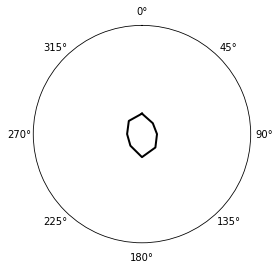

cell id 517421374
g_dsi_dg 0.377935019353817
dsi_dg 0.671993452656465
p_dg 7.14200119699427e-25
pref_dir_dg 90.0


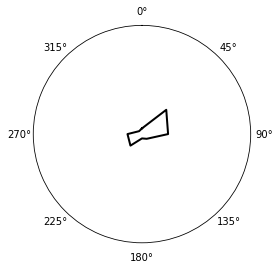

cell id 517421502
g_dsi_dg 0.440634741837281
dsi_dg 0.6121069830011
p_dg 6.34127422364358e-05
pref_dir_dg 270.0


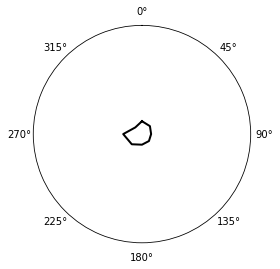

cell id 517421666
g_dsi_dg 0.728084429067583
dsi_dg 0.875891012244033
p_dg 7.54660552819151e-20
pref_dir_dg 0.0


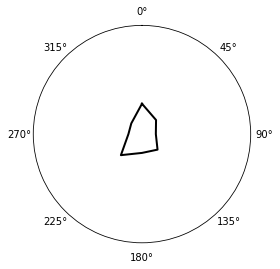

cell id 517421672
g_dsi_dg 0.215251370629562
dsi_dg 0.888952319310583
p_dg 7.61805482637634e-32
pref_dir_dg 225.0


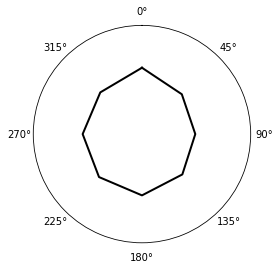

cell id 586180112
g_dsi_dg 0.605580120080405
dsi_dg 1.09196314886361
p_dg 0.0480915327241838
pref_dir_dg 225.0


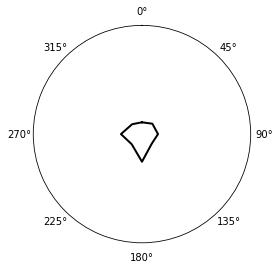

cell id 586182616
g_dsi_dg 0.823817157149233
dsi_dg 0.897753724903796
p_dg 0.000177742470227566
pref_dir_dg 270.0


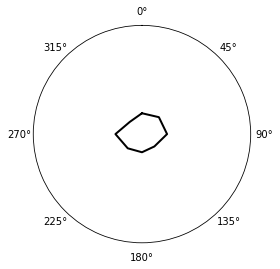

cell id 586183081
g_dsi_dg 0.241764064684105
dsi_dg 0.910470419517597
p_dg 1.81647980345134e-05
pref_dir_dg 225.0


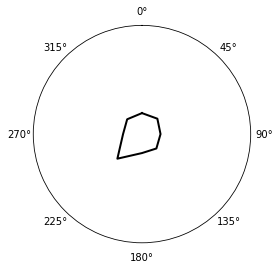

cell id 586183159
g_dsi_dg 0.823532932459045
dsi_dg 0.854531631527332
p_dg 0.0103056541850064
pref_dir_dg 90.0


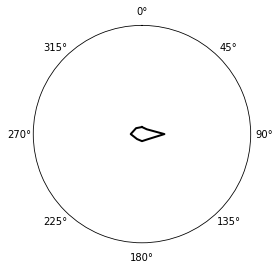

cell id 586183241
g_dsi_dg 0.780816173412687
dsi_dg 0.9575093884627
p_dg 0.00465477898074693
pref_dir_dg 45.0


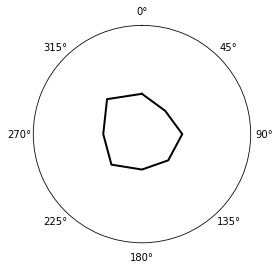

In [13]:
for i in range(len(thetas)):
    cell_id = cell_ids[i]
    print ("cell id", cell_id)
    cell_df = filtered_cells[filtered_cells.cell_specimen_id == cell_id]
    print ("g_dsi_dg", cell_df.g_dsi_dg.values[0])
    print ("dsi_dg", cell_df.dsi_dg.values[0])
    print ("p_dg", cell_df.p_dg.values[0])
    print ("pref_dir_dg", cell_df.pref_dir_dg.values[0])
    fig, axes = plt.subplots(nrows=1, ncols=1, subplot_kw=dict(polar=True))
    polar_plot(axes, thetas[i], rs[i])
    plt.show()